In [2]:
## Import
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
## Dataframe
df=pd.DataFrame()

In [4]:
## Data
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]


In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

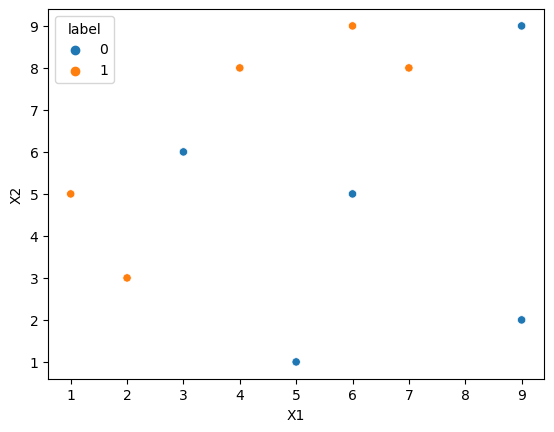

In [6]:
## Plot the data
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
## For starting adaboost execution, we need to know the initial wts.
## Initail wt= 1/n where n=total number of samples/rows
df['weights']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
## Initailize a decision stump
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)

In [20]:
## Extract X and Y
X=df.iloc[:,0:2].values
Y=df.iloc[:,2].values

In [21]:
## Train DT
dt1.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

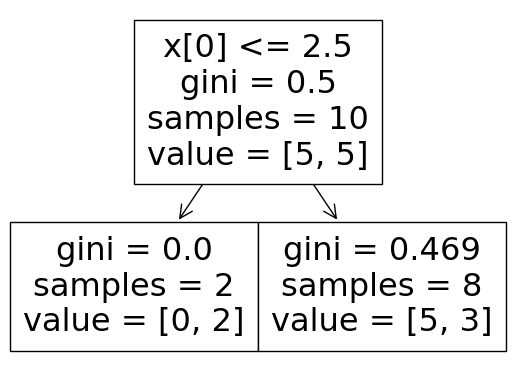

In [22]:
## plot
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

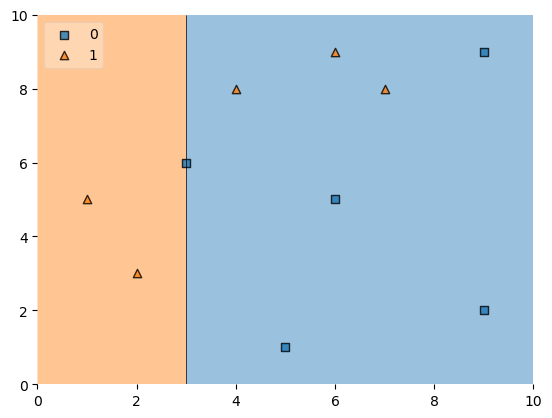

In [23]:
## Plot decision boundry
plot_decision_regions(X,Y,clf=dt1,legend=2)

In [24]:
## Prediction
df['y_pred']=dt1.predict(X)

In [25]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


If we compare the label and y_pred column we could see at 3 places error is made. Now error will be summation of weights of misclassified rows. As 3 points are misclassified so sum of those will be 0.1+0.1+0.1=0.3.

In [26]:
## Function for calculation respective model's weight i.e. alpha.
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [27]:
## Model wt for 1st decision stump
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [28]:
## Update weights
def update_row_weights(row,alpha=0.423):
    if(row['label']==row['y_pred']):
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [29]:
## Updated weights
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [30]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [31]:
df['updated_weights'].sum()

0.9165153319682015

Sum of updated weights is 0.91 but actually it has to be 1. To do this we do normalization.

In [32]:
## Normalized weights
df['normalized_weights']=df['updated_weights']/(df['updated_weights'].sum())

In [33]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [34]:
df['normalized_weights'].sum()

1.0

In [37]:
## Form Range
df['cumsum_upper']=df['normalized_weights'].cumsum()
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [38]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


Now we have to create a new dataset where we will generate 10 random numbers and check in which range these numbers will fall. In whatever range it will be falling we will select that row as part of new dataset. 

In [41]:
## function to create new dataset
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if(a>row['cumsum_lower'] and a<row['cumsum_upper']):
                indices.append(index)
    return indices

In [42]:
## Get the indexes
index_values=create_new_dataset(df)
index_values

[9, 1, 7, 2, 0, 4, 3, 0, 1, 5]

In [43]:
## Get new dataframe
second_df=df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
9,9,2,0,0.1
1,2,3,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1


When we are creating new dataset then weights will be initialized to 0.1 again.

In [44]:
## create another DT stump
dt2=DecisionTreeClassifier(max_depth=1)

In [52]:
##Extract X and Y
X=second_df.iloc[:,0:2].values
Y=second_df.iloc[:,2].values

In [53]:
## Train DT2 stump
dt2.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]')]

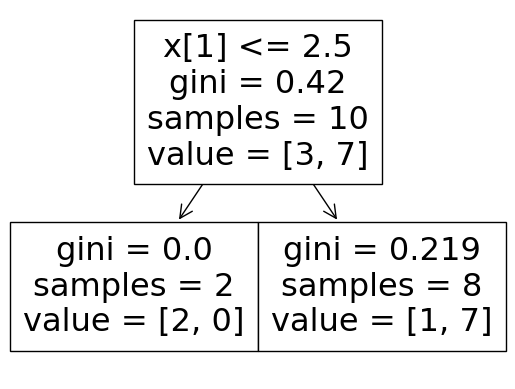

In [54]:
plot_tree(dt2)

<Axes: >

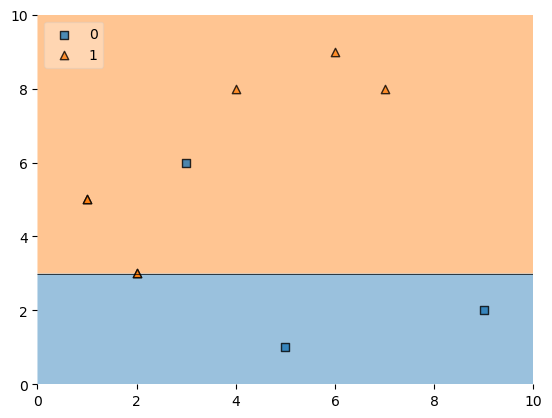

In [55]:
plot_decision_regions(X,Y,clf=dt2,legend=2)

Only 1 error its making.

In [56]:
## prediction
second_df['y_pred']=dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
1,2,3,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,1
0,1,5,1,0.1,1
4,5,1,0,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1


Only 1 error at 4th row.

In [58]:
## Calculate model wt.
## Here only 1 point is errored so total error=0.1
alpha2=calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [60]:
## Update weights
def update_row_weights(row,alpha=1.09):
    if(row['label']==row['y_pred']):
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [61]:
## Get updated weights
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
9,9,2,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
0,1,5,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


In [62]:
second_df['updated_weights'].sum()

0.6000222515923667

In [63]:
## Normalized weights
second_df['normalized_weights']=second_df['updated_weights']/(second_df['updated_weights'].sum())
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
9,9,2,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034


In [64]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [65]:
## Form ranges
second_df['cumsum_upper']=second_df['normalized_weights'].cumsum()
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_weights']
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
9,9,2,0,0.1,0,0.033622,0.056034,0.056034,0.000000
1,2,3,1,0.1,1,0.033622,0.056034,0.112068,0.056034
7,7,8,1,0.1,1,0.033622,0.056034,0.168102,0.112068
2,3,6,0,0.1,1,0.297427,0.495694,0.663796,0.168102
0,1,5,1,0.1,1,0.033622,0.056034,0.719830,0.663796
4,5,1,0,0.1,0,0.033622,0.056034,0.775864,0.719830
3,4,8,1,0.1,1,0.033622,0.056034,0.831898,0.775864
0,1,5,1,0.1,1,0.033622,0.056034,0.887932,0.831898
1,2,3,1,0.1,1,0.033622,0.056034,0.943966,0.887932
5,6,9,1,0.1,1,0.033622,0.056034,1.000000,0.943966


In [66]:
## Create new dataset
index_list=create_new_dataset(second_df)
index_list

[2, 2, 2, 0, 2, 0, 2, 2, 5, 0]

In [68]:
## Third dataset
third_df=second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
5,6,9,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
9,9,2,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
9,9,2,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1


In [72]:
## create 3rd DT stump
dt3=DecisionTreeClassifier(max_depth=1)

## Extract X and Y
X=third_df.iloc[:,0:2].values
Y=third_df.iloc[:,2].values

## Train
dt3.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]')]

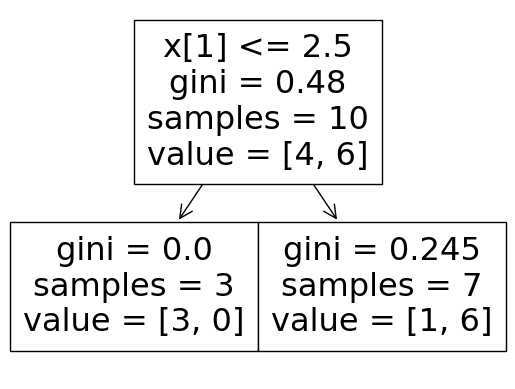

In [73]:
## 3rd DT stump
plot_tree(dt3)

<Axes: >

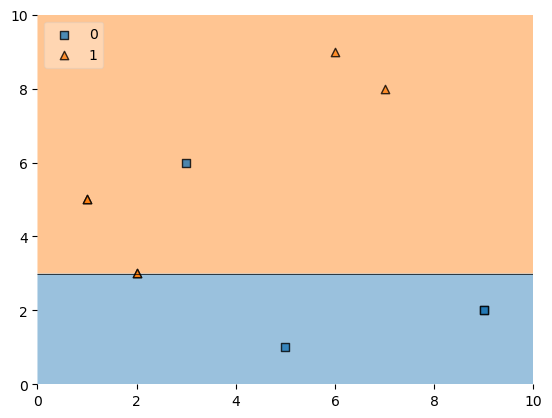

In [74]:
plot_decision_regions(X,Y,clf=dt3,legend=2)

Again we have 1 error.

In [76]:
## Prediction
third_df['y_pred']=dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
1,2,3,1,0.1,1
0,1,5,1,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0
0,1,5,1,0.1,1
2,3,6,0,0.1,1
9,9,2,0,0.1,0
1,2,3,1,0.1,1
4,5,1,0,0.1,0


In [77]:
## error= 0.1
alpha3=calculate_model_weight(0.1)
alpha3

1.0986122886681098

In [78]:
## All 3 decision stumps alpha's
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 1.0986122886681098


In [80]:
## Prediction
## Pick up any query point from original df
## dt1 prediction
query=np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [81]:
## dt2 prediction
dt2.predict(query)

array([1], dtype=int64)

In [82]:
## dt3 prediction
dt3.predict(query)

array([1], dtype=int64)

In [83]:
## Final prediction
alpha1*(1)+alpha2*(1)+alpha3*(1)

2.6208735075298213

In [85]:
## Get the sign
np.sign(2.62)

1.0

Final output will be 1 for this query point.